In [1]:
greetings = "Assalam-o-Alaikum!"
print(greetings)

Assalam-o-Alaikum!


### Import Libraries

In [21]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Import Dataset

In [3]:
sales_df = pd.read_csv('grocery_sales.csv')
sales_df[:3]

,storeID,product,quantity,revenue
0,A,Apples,1811,9300.6
1,A,Bananas,1003,3375.2
2,A,Oranges,1604,8528.5


### Manual Feature Extraction

In [4]:
# Calculate the price from the quantity sold and revenue
sales_df['price'] = sales_df['revenue'] / sales_df['quantity']

# Drop the quantity and revenue features
reduced_df = sales_df.drop(['revenue', 'quantity'], axis=1)

reduced_df[:3]

,storeID,product,price
0,A,Apples,5.135616
1,A,Bananas,3.365105
2,A,Oranges,5.317020


### Calculating Principal Components

In [5]:
male = pd.read_csv("Ansur_Male.csv")
female = pd.read_csv("Ansur_Female.csv")
ansur_df = pd.concat([male, female])
ansur_df[:3]

,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,...,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
0,Combat Arms,Regular Army,Male,266,1467,337,222,1347,253,202,...,240,440,1054,175,853,81.5,1.776,25.838761,Overweight,Tall
1,Combat Support,Regular Army,Male,233,1395,326,220,1293,245,193,...,225,371,1054,167,815,72.6,1.702,25.062103,Overweight,Normal
2,Combat Support,Regular Army,Male,287,1430,341,230,1327,256,196,...,255,411,1041,180,831,92.9,1.735,30.861480,Overweight,Normal


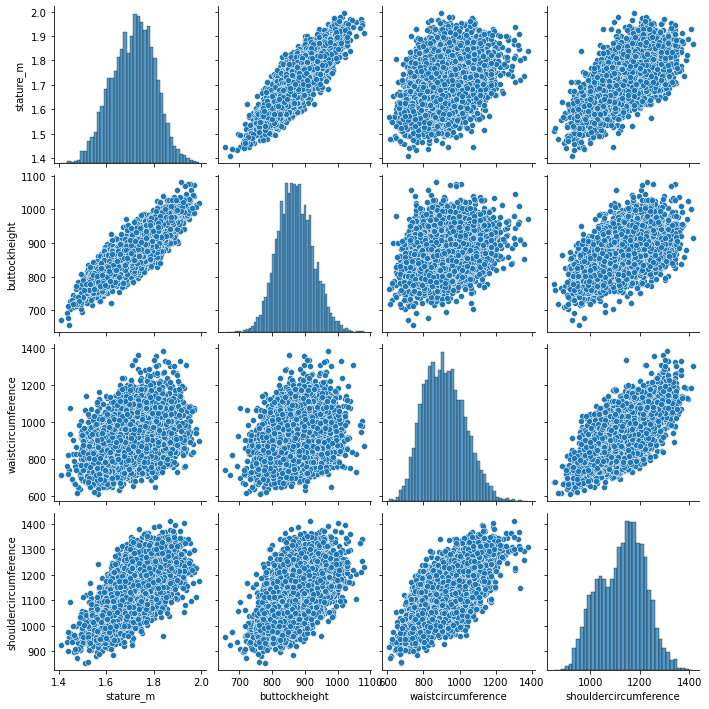

In [6]:
ansur_df_1 = ansur_df[['stature_m', 'buttockheight', 'waistcircumference', 'shouldercircumference']]

# Create a pairplot to inspect ansur_df
sns.pairplot(ansur_df_1)

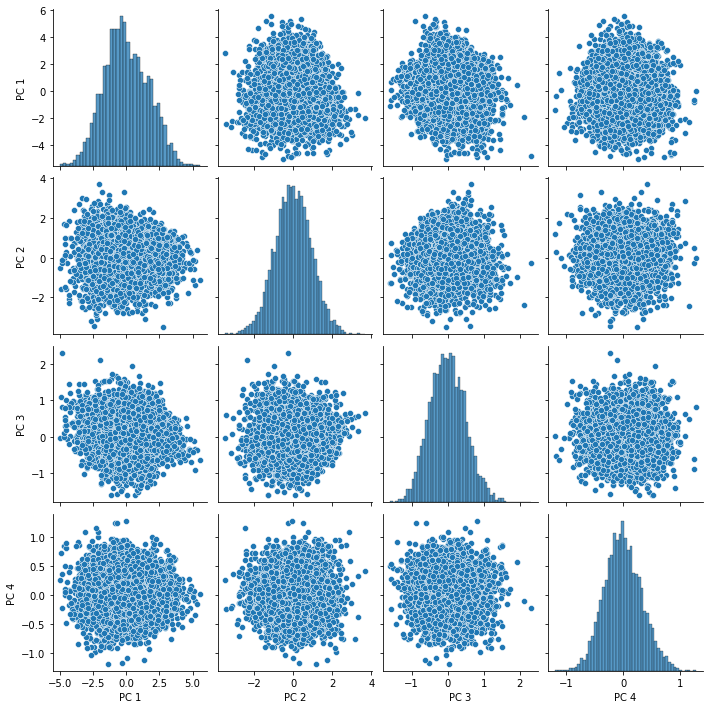

In [7]:
# Create the scaler
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df_1)

# Create the PCA instance and fit and transform the data with pca
pca = PCA()
pc = pca.fit_transform(ansur_std)
pc_df = pd.DataFrame(pc, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4'])

# Create a pairplot of the principal component dataframe
sns.pairplot(pc_df)

### PCA on a larger dataset

In [8]:
ansur_df_2 = ansur_df[['stature_m', 'buttockheight', 'waistdepth', 'span', 'waistcircumference', 'shouldercircumference', 'footlength', 'handlength', 'functionalleglength', 'chestheight', 'chestcircumference', 'cervicaleheight', 'sittingheight']]

In [9]:
ansur_std = scaler.fit_transform(ansur_df_2)

# Apply PCA
pca = PCA()
pca.fit(ansur_std)

PCA()

### PCA explained variance

In [10]:
# Inspect the explained variance ratio per component
print(pca.explained_variance_ratio_)

[6.96695776e-01 1.65318195e-01 4.41759304e-02 3.10140882e-02
 1.96244729e-02 1.05810800e-02 1.00183486e-02 7.58854596e-03
 5.29894105e-03 4.64328943e-03 2.69987761e-03 1.87568473e-03
 4.65770148e-04]


In [11]:
# Print the cumulative sum of the explained variance ratio
print(pca.explained_variance_ratio_.cumsum())

[0.69669578 0.86201397 0.9061899  0.93720399 0.95682846 0.96740954
 0.97742789 0.98501644 0.99031538 0.99495867 0.99765855 0.99953423
 1.        ]


### Understanding the components

In [12]:
pokemon_df = pd.read_csv("pokemon.csv")

poke_df = pokemon_df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

poke_df[:3]

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80


In [13]:
# Build the pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit it to the dataset and extract the component vectors
pipe.fit(poke_df)
vectors = pipe.steps[1][1].components_.round(2)

# Print feature effects
pd.DataFrame({"PC1 Columns": poke_df.columns,
              "PC1 Vectors": vectors[0],
              "PC2 Vectors": vectors[1]})

,PC1 Columns,PC1 Vectors,PC2 Vectors
0,HP,0.39,0.08
1,Attack,0.44,-0.01
2,Defense,0.36,0.63
3,Sp. Atk,0.46,-0.31
4,Sp. Def,0.45,0.24
5,Speed,0.34,-0.67


### PCA for feature exploration

In [14]:
poke_cat_df = pokemon_df[['Type 1', 'Legendary']]
poke_cat_df[:3]

,Type 1,Legendary
0,Grass,False
1,Grass,False
2,Grass,False


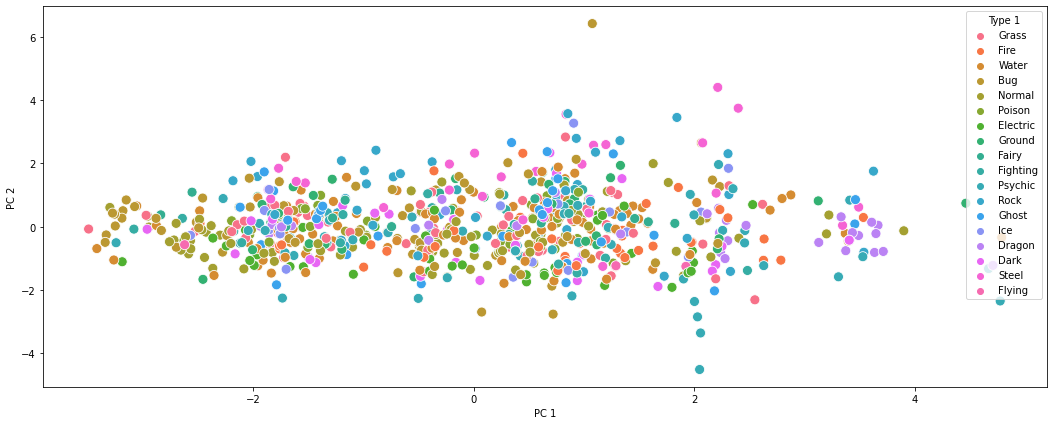

In [15]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(poke_df)

# Add the 2 components to poke_cat_df
poke_cat_df['PC 1'] = pc[:, 0]
poke_cat_df['PC 2'] = pc[:, 1]

# Use the Type feature to color the PC 1 vs PC 2 scatterplot
plt.figure(figsize = (18, 7)) 
sns.scatterplot(data=poke_cat_df, 
                x='PC 1',
                y='PC 2',
                hue='Type 1',
                s = 100)
plt.show()

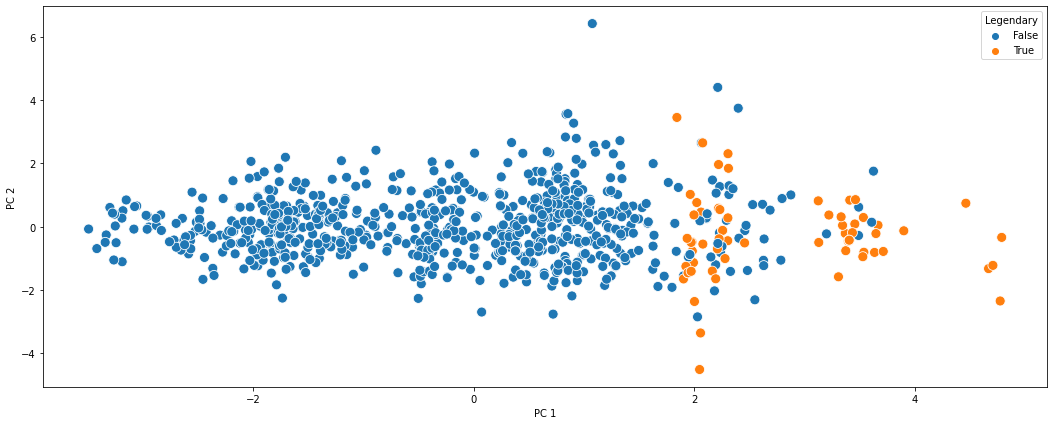

In [16]:
plt.figure(figsize = (18, 7)) 
sns.scatterplot(data=poke_cat_df, 
                x='PC 1',
                y='PC 2',
                hue='Legendary',
                s = 100)
plt.show()

### PCA in a model pipeline

In [19]:
X = pokemon_df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
y = pokemon_df['Legendary']
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.3, 
                                                    random_state = 0)

In [22]:
# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=3)),
        ('classifier', RandomForestClassifier(n_estimators = 10, random_state=0))])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the explained variance ratio and accuracy
print(pipe.steps[1][1].explained_variance_ratio_)
print('{0:.1%} test set accuracy'.format(accuracy))

[0.45673596 0.18599109 0.12852181]
93.3% test set accuracy


### Selecting the proportion of variance to keep

In [25]:
ansur_df = ansur_df[ansur_df.columns.drop(["Branch","Component", "Gender", "BMI_class", "Height_class"])]

In [33]:
# Let PCA select 90% of the variance
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=0.9))])

# Fit the pipe to the data
pipe.fit(ansur_df)

print('{} components selected'.format(len(pipe.steps[1][1].components_)))

17 components selected


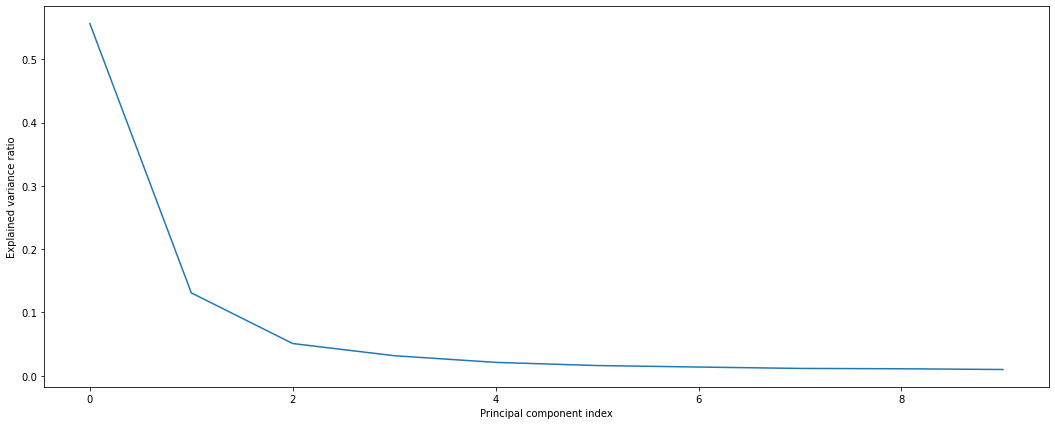

In [36]:
# Pipeline a scaler and pca selecting 10 components
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=10))])

# Fit the pipe to the data
pipe.fit(ansur_df)

# Plot the explained variance ratio
plt.figure(figsize = (18, 7))
plt.plot(pipe.steps[1][1].explained_variance_ratio_)

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()